<a href="https://colab.research.google.com/github/sai-phyo-hein/Hybrid_Transformer_for_Portfolio_Allocation/blob/main/EDA_and_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

### Utility functions to fetch data fron **yfinance**

In [3]:
def get_ticker_data(yf_symbol, start="2014-01-01", end="2024-03-31"):
  df = pdr.get_data_yahoo(yf_symbol, start=start, end=end)
  return df

def get_market_cap(yf_symbol):
  ticker = yf.Ticker(yf_symbol)
  res = {}
  res[yf_symbol] = ticker.get_info()['marketCap']
  return res

### Metadata about the Nifty 50 stocks.

This file consists of the constituent stocks of current Nifty 50 stocks and its addictional information such as

1. Stock's Industry
2. Code
3. Symbol etc.

In [4]:
nifty_50 = pd.read_csv('/content/ind_nifty50list.csv')
nifty_50.rename(columns={'Company Name': 'company_name', 'Industry': 'industry', 'Symbol': 'symbol',
                         'Series': 'series', 'ISIN Code': 'isin_code'}, inplace=True)

nifty_50['yf_symbol'] = nifty_50['symbol'] + '.NS'
nifty_50.head(5)

,company_name,industry,symbol,series,isin_code,yf_symbol
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS


### Get historical data for a given ticker

In [5]:
get_ticker_data(nifty_50['yf_symbol'][0])

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-01,40.433960,41.368938,40.204048,41.192673,37.967476,7564701
2014-01-02,40.464615,41.192673,38.824574,39.138786,36.074402,17188171
2014-01-03,38.778587,39.246078,37.475750,38.065861,35.085484,11525782
2014-01-06,37.996887,39.069813,37.506405,38.632977,35.608189,10660990
2014-01-07,38.832237,39.069813,36.939289,37.084900,34.181320,11002957
...,...,...,...,...,...,...
2024-03-21,3089.550049,3107.100098,3059.600098,3066.500000,3066.500000,1175751
2024-03-22,3066.550049,3128.949951,3048.050049,3107.699951,3107.699951,951557
2024-03-26,3100.500000,3171.949951,3089.100098,3109.949951,3109.949951,937103


In [6]:
list_sym = list(nifty_50['yf_symbol'])
list_sym

['ADANIENT.NS',
 'ADANIPORTS.NS',
 'APOLLOHOSP.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LTIM.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHRIRAMFIN.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [7]:
nifty_50['market_cap'] = nifty_50['yf_symbol'].apply(lambda x: get_market_cap(x)[x])
nifty_50

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3512567857152
1,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,ADANIPORTS.NS,2848342409216
2,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,858159185920
3,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2750586552320
4,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
5,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2445644660736
6,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
7,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2540434358272
8,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1342331944960
9,Bharti Airtel Ltd.,Telecommunication,BHARTIARTL,EQ,INE397D01024,BHARTIARTL.NS,7923666780160


In [8]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  50 non-null     object
 1   industry      50 non-null     object
 2   symbol        50 non-null     object
 3   series        50 non-null     object
 4   isin_code     50 non-null     object
 5   yf_symbol     50 non-null     object
 6   market_cap    50 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


### Number of stocks per Sector

In [18]:
stocks_per_sector = nifty_50['industry'].value_counts().to_frame().reset_index()
stocks_per_sector

,industry,count
0,Financial Services,11
1,Automobile and Auto Components,6
2,Information Technology,6
3,Healthcare,5
4,Fast Moving Consumer Goods,5
5,Metals & Mining,4
6,Oil Gas & Consumable Fuels,4
7,Consumer Durables,2
8,Construction Materials,2
9,Power,2


We see that stocks from "Financial" is the majority contributor to the NITFY 50

In [ ]:
grp = nifty_50.groupby('industry')['Symbol']

In [11]:
nifty_50.groupby(['industry', 'yf_symbol'] )['symbol'].any()

industry                        yf_symbol    
Automobile and Auto Components  BAJAJ-AUTO.NS    True
                                EICHERMOT.NS     True
                                HEROMOTOCO.NS    True
                                M&M.NS           True
                                MARUTI.NS        True
                                TATAMOTORS.NS    True
Construction                    LT.NS            True
Construction Materials          GRASIM.NS        True
                                ULTRACEMCO.NS    True
Consumer Durables               ASIANPAINT.NS    True
                                TITAN.NS         True
Fast Moving Consumer Goods      BRITANNIA.NS     True
                                HINDUNILVR.NS    True
                                ITC.NS           True
                                NESTLEIND.NS     True
                                TATACONSUM.NS    True
Financial Services              AXISBANK.NS      True
                                BAJA

In [ ]:
grp.get_group('Financial Services')

4       AXISBANK
6     BAJFINANCE
7     BAJAJFINSV
18      HDFCBANK
19      HDFCLIFE
23     ICICIBANK
25    INDUSINDBK
28     KOTAKBANK
38       SBILIFE
39    SHRIRAMFIN
40          SBIN
Name: Symbol, dtype: object

### Stock selection process for constructing the portfolio

We have planned to construct an equity portfolio consist of stocks from diverse sector in order to induct "risk diversification". Below are the steps in selecting the stocks for the "equity portfolio"

1. Select the **top two stocks** from each sector from the NIFTY 50 constituent. Here the top 2 selection is based on the criteria of market capitalization.

2. We will select the stocks directly if its the sole member of a particular sector. For example: Telecommunication sector has just one stock - **Bharti Airtel**. Hence it will be selected implicitly

### Selection of top 2 stocks from

In [20]:
filtered_sectors = stocks_per_sector[stocks_per_sector['count'] >= 2]['industry']
filtered_sectors

0                Financial Services
1    Automobile and Auto Components
2            Information Technology
3                        Healthcare
4        Fast Moving Consumer Goods
5                   Metals & Mining
6        Oil Gas & Consumable Fuels
7                 Consumer Durables
8            Construction Materials
9                             Power
Name: industry, dtype: object

In [28]:
filtered_df = nifty_50[nifty_50['industry'].isin(filtered_sectors)].reset_index(drop=True)
filtered_df

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3512567857152
1,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,858159185920
2,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2750586552320
3,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
4,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2445644660736
5,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
6,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2540434358272
7,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1342331944960
8,Britannia Industries Ltd.,Fast Moving Consumer Goods,BRITANNIA,EQ,INE216A01030,BRITANNIA.NS,1156130275328
9,Cipla Ltd.,Healthcare,CIPLA,EQ,INE059A01026,CIPLA.NS,1137013424128


In [37]:
df = filtered_df.sort_values(['market_cap'], ascending=False).groupby('industry')
df.get_group('Financial Services')

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
16,HDFC Bank Ltd.,Financial Services,HDFCBANK,EQ,INE040A01034,HDFCBANK.NS,11619458351104
21,ICICI Bank Ltd.,Financial Services,ICICIBANK,EQ,INE090A01021,ICICIBANK.NS,8148951760896
37,State Bank of India,Financial Services,SBIN,EQ,INE062A01020,SBIN.NS,7376189521920
5,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
3,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
26,Kotak Mahindra Bank Ltd.,Financial Services,KOTAKBANK,EQ,INE237A01028,KOTAKBANK.NS,3260984066048
6,Bajaj Finserv Ltd.,Financial Services,BAJAJFINSV,EQ,INE918I01026,BAJAJFINSV.NS,2540434358272
35,SBI Life Insurance Company Ltd.,Financial Services,SBILIFE,EQ,INE123W01016,SBILIFE.NS,1424440819712
17,HDFC Life Insurance Company Ltd.,Financial Services,HDFCLIFE,EQ,INE795G01014,HDFCLIFE.NS,1236907720704
23,IndusInd Bank Ltd.,Financial Services,INDUSINDBK,EQ,INE095A01012,INDUSINDBK.NS,1157556469760


In [27]:
filtered_df.groupby('industry').head(2)

,company_name,industry,symbol,series,isin_code,yf_symbol,market_cap
0,Adani Enterprises Ltd.,Metals & Mining,ADANIENT,EQ,INE423A01024,ADANIENT.NS,3512567857152
1,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,APOLLOHOSP.NS,858159185920
2,Asian Paints Ltd.,Consumer Durables,ASIANPAINT,EQ,INE021A01026,ASIANPAINT.NS,2750586552320
3,Axis Bank Ltd.,Financial Services,AXISBANK,EQ,INE238A01034,AXISBANK.NS,3578894483456
4,Bajaj Auto Ltd.,Automobile and Auto Components,BAJAJ-AUTO,EQ,INE917I01010,BAJAJ-AUTO.NS,2445644660736
5,Bajaj Finance Ltd.,Financial Services,BAJFINANCE,EQ,INE296A01024,BAJFINANCE.NS,4218893369344
7,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,BPCL,EQ,INE029A01011,BPCL.NS,1342331944960
8,Britannia Industries Ltd.,Fast Moving Consumer Goods,BRITANNIA,EQ,INE216A01030,BRITANNIA.NS,1156130275328
9,Cipla Ltd.,Healthcare,CIPLA,EQ,INE059A01026,CIPLA.NS,1137013424128
10,Coal India Ltd.,Oil Gas & Consumable Fuels,COALINDIA,EQ,INE522F01014,COALINDIA.NS,2793257304064


In [ ]:
titan['log_returns'] = np.log1p(titan['CH_CLOSING_PRICE'].pct_change())
tcs['log_returns'] = np.log1p(tcs['CH_CLOSING_PRICE'].pct_change())

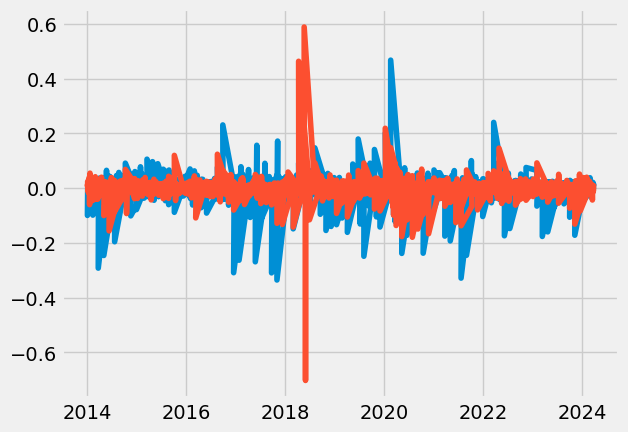

In [ ]:
plt.plot(titan['log_returns'])
plt.plot(tcs['log_returns'])
plt.show()

### Stationarity Test

The hypotheses for the Augmented Dickey-Fuller (ADF) test are [2]:

1. Null hypothesis (H0): The time series is not stationary because there is a unit root (if p-value > 0.05)
2. Alternative hypothesis (H1): The time series is stationary because there is no unit root (if p-value ≤ 0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(titan['log_returns'].values)
result

### KPSS Test For Stationarity

In [ ]:
from statsmodels.tsa.stattools import kpss

adftest = kpss(titan['log_returns'].values,
              regression = "ct")

print("ADF Test Results")
print("Null Hypothesis: The series has a unit root (non-stationary)")
print("ADF-Statistic:", adftest[0])
print("P-Value:", adftest[1])
print("Number of lags:", adftest[2])
print("Number of observations:", adftest[3])
print("Critical Values:", adftest[4])
print("Note: If P-Value is smaller than 0.05, we reject the null hypothesis and the series is stationary")

In [ ]:
yf.download('TCS.NS')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.121262,212976
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.740547,153576
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.828018,822776
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.828018,0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.766037,811856
...,...,...,...,...,...,...
2024-04-22,3837.000000,3878.000000,3812.000000,3864.600098,3864.600098,1728883
2024-04-23,3877.050049,3895.000000,3860.600098,3874.699951,3874.699951,1807586
2024-04-24,3890.000000,3898.000000,3824.449951,3831.050049,3831.050049,1317312


In [ ]:
yf.download('INFY.NS').columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
yf.download("SILVERBEES.NS").columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')